In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from numpy import percentile
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings("ignore")

1. Import and understand the data.
   A. Import ‘signal-data.csv’ as DataFrame. 
   B. Print 5 point summary and share at least 2 observations. [

In [2]:
signal_data = pd.read_csv('signal-data.csv')
signal_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
signal_data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [4]:
signal_data.iloc[:,1]

0       3030.93
1       3095.78
2       2932.61
3       2988.72
4       3032.24
         ...   
1562    2899.41
1563    3052.31
1564    2978.81
1565    2894.92
1566    2944.92
Name: 0, Length: 1567, dtype: float64

In [5]:
signal_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


a)There are outliers in certain columns. 
b)Some columns have Nan values. 
d)Certain column (eg. col 5. have all its entries to be100.)
d)The first column Time need to be converted.

2. Data cleansing:
A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 

In [6]:
null_percent=signal_data.isnull().sum().sum()/len(signal_data)
null_percent

26.771537970644545

In [7]:
null_percent_1 = signal_data.iloc[:,3].isnull().sum().sum()/len(signal_data)
null_percent_1

0.008934269304403318

In [8]:
signal_data['Time'] = pd.to_datetime(signal_data['Time'])
signal_data.dtypes

Time         datetime64[ns]
0                   float64
1                   float64
2                   float64
3                   float64
                  ...      
586                 float64
587                 float64
588                 float64
589                 float64
Pass/Fail             int64
Length: 592, dtype: object

In [9]:
signal_data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [10]:
#remove all the features with 20%+ Null values and impute rest with mean of the feature.
temp1 = signal_data
for col in signal_data.columns:
    null_percent_1 = temp1[col].isnull().sum().sum()/len(temp1)
    if null_percent_1 > 0.2:
        del signal_data[col]
    else :
        mean_value=signal_data[col].mean()
        signal_data[col].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(signal_data)

Updated Dataframe:
                    Time        0        1          2          3       4  \
0    2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1    2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2    2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3    2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4    2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                  ...      ...      ...        ...        ...     ...   
1562 2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563 2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564 2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565 2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566 2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7         8  ...      577     582     58

In [11]:
signal_data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 560, dtype: int64

B. Identify and drop the features which are having same value for all the rows. 

In [12]:
 signal_data = signal_data.loc[:, signal_data.nunique() > 1]

In [13]:
signal_data.head(10)

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.034200,0.015100,0.005200,44.007700,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.5816,-0.0270,...,8.3645,0.5010,0.0143,0.0042,2.8515,0.034200,0.015100,0.005200,44.007700,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5153,0.0157,...,16.0862,0.4984,0.0106,0.0034,2.1261,0.020400,0.019400,0.006300,95.031000,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5358,0.0111,...,14.2892,0.4993,0.0172,0.0046,3.4456,0.011100,0.012400,0.004500,111.652500,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5381,0.0159,...,7.4181,0.4967,0.0152,0.0038,3.0687,0.021200,0.019100,0.007300,90.229400,-1


In [14]:
signal_data = signal_data.drop(['Time'], axis = 1, inplace = False)

In [15]:
#converting Pass as 1 and Fail as 0
signal_data['Pass/Fail'] = signal_data['Pass/Fail'].replace(to_replace = [-1,1], value = [1,0])
signal_data.head(2)

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,1


2C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [16]:
X = signal_data.drop(['Pass/Fail'], axis = 1, inplace = False)
y = signal_data['Pass/Fail']

In [17]:
#applying Select Kbest to extract  features based on scores
sel_fs = SelectKBest(score_func = f_classif, k= 'all')
sel_fs.fit(X,y)
# transform input data
X_fs = sel_fs.transform(X)
X_df = pd.DataFrame(X_fs)
#X_df
X_fs

array([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
        1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
       [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
        2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
       [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
        4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
       ...,
       [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
        8.60000000e-03, 2.50000000e-03, 4.35231000e+01],
       [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
        2.45000000e-02, 7.50000000e-03, 9.34941000e+01],
       [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
        1.62000000e-02, 4.50000000e-03, 1.37784400e+02]])

Feature 0: 0.989819
Feature 1: 0.010602
Feature 2: 0.001434
Feature 3: 0.949412
Feature 4: 0.296189
Feature 5: 0.412804
Feature 6: 0.264149
Feature 7: 1.229361
Feature 8: 1.523998
Feature 9: 1.772982
Feature 10: 1.667060
Feature 11: 0.055760
Feature 12: 7.481229
Feature 13: 0.013021
Feature 14: 0.008688
Feature 15: 0.147179
Feature 16: 0.122662
Feature 17: 1.458414
Feature 18: 0.846650
Feature 19: 18.468623
Feature 20: 8.472554
Feature 21: 0.259399
Feature 22: 0.524115
Feature 23: 2.073962
Feature 24: 10.373290
Feature 25: 1.336053
Feature 26: 18.045409
Feature 27: 0.458572
Feature 28: 2.170141
Feature 29: 3.767981
Feature 30: 4.264878
Feature 31: 10.321574
Feature 32: 0.010065
Feature 33: 0.236044
Feature 34: 0.010065
Feature 35: 2.677516
Feature 36: 4.342067
Feature 37: 0.007079
Feature 38: 4.204600
Feature 39: 0.009628
Feature 40: 0.656022
Feature 41: 0.841267
Feature 42: 0.109051
Feature 43: 0.138679
Feature 44: 1.242320
Feature 45: 0.364850
Feature 46: 0.360477
Feature 47: 0.05643

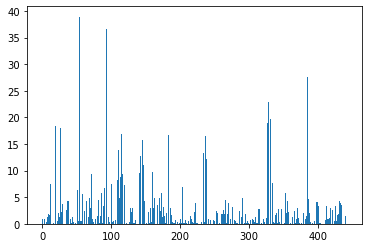

In [18]:
# Finding F Score for the features
for i in range (len(sel_fs.scores_)):
    print('Feature %d: %f' % (i,sel_fs.scores_[i] ))
#plot the scores
plt.bar([i for i in range(len(sel_fs.scores_))], sel_fs.scores_)
plt.show()

#Here we can see some features stand out perhaps because of them being more relevant than others, with higher test statistic value.
higher the value better. So going forward with feature score greater than 1.0, dropping the rest lower scores.

In [19]:
#Dropping lower f scores 
drop_fs = [column for column in X_df.columns if any(X_df[column] < 0.1)]
print(drop_fs)

[3, 6, 8, 9, 19, 20, 21, 22, 23, 24, 25, 28, 39, 54, 66, 67, 68, 69, 70, 71, 72, 73, 74, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 114, 115, 125, 126, 128, 129, 130, 131, 132, 137, 140, 141, 142, 143, 144, 145, 146, 147, 150, 151, 153, 158, 159, 161, 164, 168, 171, 174, 175, 177, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 196, 198, 199, 200, 201, 202, 203, 205, 207, 208, 210, 217, 218, 220, 221, 222, 223, 224, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 242, 243, 245, 246, 247, 248, 250, 251, 253, 256, 260, 263, 266, 267, 269, 271, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284, 285, 286, 288, 290, 291, 292, 293, 294, 295, 296, 297, 299, 301, 302, 303, 304, 311, 314, 316, 317, 327, 328, 329, 330, 331, 332, 333, 335, 339, 344, 345, 355, 360, 361, 363, 365, 368, 369, 370, 371, 372, 373, 374, 375, 379, 383, 384, 385, 386, 388, 390, 399, 400, 405, 408, 410, 415, 416, 421, 423, 429, 431, 435, 436, 438, 439, 440, 441]


In [20]:
X_1 = X_df.drop(drop_fs,axis = 1)
X_1

,0,1,2,4,5,7,10,11,12,13,...,424,425,426,427,428,430,432,433,434,437
0,3030.93,2564.00,2187.7333,1.3602,97.6133,1.500500,0.945500,202.439600,7.955800,414.871000,...,2.452417,21.117674,533.8500,2.1113,8.95,3.0624,1.6765,14.9509,0.5005,2.3630
1,3095.78,2465.14,2230.4222,0.8294,102.3433,1.496600,0.962700,200.547000,10.154800,414.734700,...,2.452417,21.117674,535.0164,2.4335,5.92,2.0111,1.1065,10.9003,0.5019,4.4447
2,2932.61,2559.94,2186.4111,1.5102,95.4878,1.443600,0.961500,202.017900,9.515700,416.707500,...,0.411900,68.848900,535.0245,2.0293,11.21,4.0923,2.0952,9.2721,0.4958,3.1745
3,2988.72,2479.90,2199.0333,1.3204,104.2367,1.488200,0.962900,201.848200,9.605200,422.289400,...,2.729000,25.036300,530.5682,2.0253,9.33,2.8971,1.7585,8.5831,0.4990,2.0544
4,3032.24,2502.87,2233.3667,1.5334,100.3967,1.503100,0.956900,201.942400,10.566100,420.592500,...,2.452417,21.117674,532.0155,2.0275,8.83,3.1776,1.6597,10.9698,0.4800,99.3032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,1.4843,82.2467,1.342400,0.957900,203.986700,11.769200,419.340400,...,1.884400,15.466200,536.3418,2.0153,7.98,2.6401,1.4879,11.7256,0.4988,2.8669
1563,3052.31,2522.55,2198.5667,0.8763,98.4689,1.433300,0.961800,204.017300,9.162000,405.817800,...,1.708900,20.911800,537.9264,2.1814,5.48,1.9077,1.0187,17.8379,0.4975,2.6238
1564,2978.81,2379.78,2206.3000,0.8236,99.4122,1.462862,0.964353,199.956809,9.005371,413.086035,...,4.319700,29.095400,530.3709,2.3435,6.49,2.1760,1.2237,17.7267,0.4987,3.0590
1565,2894.92,2532.01,2177.0333,1.5726,98.7978,1.462200,0.969400,197.244800,9.735400,401.915300,...,1.884400,15.466200,534.3936,1.9098,9.13,3.2524,1.7085,19.2104,0.5004,3.5662


In [21]:
# on dropping higher lower F scores we finally got 235 columns.

Features with very low standard deviations are dropped


In [22]:
# check whether features have zero standard deviation and drop them,
X_2=X_1
for i in -np.sort(-X_2.std().index):
    if (X_2.std()[i] < 0.1):
        #print (i , " : ", X_2.std()[i])
        X_2 = X_2.drop([i],axis=1)
X_2.shape

(1567, 206)

Features that show high correlations are dropped

In [23]:
#Dropping highly correlated
cor = X_2.corr().abs()
cor

,0,1,2,4,5,11,12,13,14,16,...,422,424,425,426,427,428,430,432,433,437
0,1.000000,0.143840,0.004756,0.011014,0.002270,0.010368,0.007058,0.030675,0.005749,0.017691,...,0.057316,0.060010,0.049862,0.018953,0.023166,0.013678,0.015206,0.013228,0.008601,0.023589
1,0.143840,1.000000,0.005767,0.001636,0.025564,0.034062,0.037667,0.087315,0.001878,0.042938,...,0.009774,0.017051,0.025490,0.009000,0.037932,0.001753,0.001303,0.002570,0.010145,0.002273
2,0.004756,0.005767,1.000000,0.095891,0.136225,0.018326,0.006476,0.006115,0.000788,0.021878,...,0.050484,0.050434,0.064282,0.037070,0.015600,0.000518,0.001342,0.002592,0.028705,0.015752
4,0.011014,0.001636,0.095891,1.000000,0.074368,0.002707,0.017523,0.011435,0.001763,0.001610,...,0.015146,0.012944,0.027696,0.005273,0.081983,0.012024,0.012264,0.012163,0.004070,0.001616
5,0.002270,0.025564,0.136225,0.074368,1.000000,0.058982,0.055333,0.039815,0.040015,0.033196,...,0.015393,0.016000,0.070722,0.017264,0.026100,0.009292,0.007783,0.007409,0.012342,0.039517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.013678,0.001753,0.000518,0.012024,0.009292,0.036757,0.000807,0.024789,0.014068,0.055371,...,0.054146,0.042853,0.013062,0.274167,0.151217,1.000000,0.993689,0.994772,0.863768,0.017179
430,0.015206,0.001303,0.001342,0.012264,0.007783,0.032908,0.000409,0.024032,0.014005,0.050808,...,0.052457,0.041095,0.014923,0.307529,0.138441,0.993689,1.000000,0.991738,0.851784,0.016812
432,0.013228,0.002570,0.002592,0.012163,0.007409,0.035743,0.000985,0.023509,0.014167,0.054269,...,0.050525,0.039613,0.012528,0.360498,0.136232,0.994772,0.991738,1.000000,0.859278,0.017147
433,0.008601,0.010145,0.028705,0.004070,0.012342,0.031434,0.009505,0.019152,0.004396,0.040682,...,0.063683,0.051925,0.009732,0.247655,0.121115,0.863768,0.851784,0.859278,1.000000,0.023910


In [24]:
up_tri = cor.where(np.triu(np.ones(cor.shape),k = 1).astype(np.bool)) 
print(up_tri)

     0        1         2         4         5         11        12        13   \
0    NaN  0.14384  0.004756  0.011014  0.002270  0.010368  0.007058  0.030675   
1    NaN      NaN  0.005767  0.001636  0.025564  0.034062  0.037667  0.087315   
2    NaN      NaN       NaN  0.095891  0.136225  0.018326  0.006476  0.006115   
4    NaN      NaN       NaN       NaN  0.074368  0.002707  0.017523  0.011435   
5    NaN      NaN       NaN       NaN       NaN  0.058982  0.055333  0.039815   
..   ...      ...       ...       ...       ...       ...       ...       ...   
428  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
430  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
432  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
433  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
437  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          14        16   ..

In [25]:
#dropping all features that show correlation greater than 0.7
to_drop = [column for column in up_tri.columns if any(up_tri[column] > 0.7)]
print()
print (to_drop)


[32, 33, 34, 37, 43, 46, 47, 55, 60, 61, 64, 110, 111, 113, 133, 136, 138, 139, 166, 169, 170, 172, 176, 178, 180, 206, 213, 214, 215, 216, 219, 225, 226, 227, 230, 240, 241, 252, 254, 255, 257, 258, 259, 261, 262, 264, 265, 268, 270, 272, 273, 283, 287, 289, 298, 300, 305, 306, 307, 308, 309, 310, 312, 313, 318, 319, 321, 322, 324, 325, 334, 338, 342, 343, 346, 348, 349, 350, 351, 352, 356, 357, 358, 362, 364, 366, 367, 376, 380, 382, 389, 391, 394, 396, 397, 407, 409, 412, 413, 422, 424, 430, 432, 433]


In [26]:
X_cor = X_2.drop(to_drop,axis = 1)
X_cor

,0,1,2,4,5,11,12,13,14,16,...,411,417,418,419,420,425,426,427,428,437
0,3030.93,2564.00,2187.7333,1.3602,97.6133,202.439600,7.955800,414.871000,10.043300,192.396300,...,39.8842,42.3877,262.729683,0.679641,6.444985,21.117674,533.8500,2.1113,8.95,2.3630
1,3095.78,2465.14,2230.4222,0.8294,102.3433,200.547000,10.154800,414.734700,9.259900,191.287200,...,53.1836,18.1087,262.729683,0.679641,6.444985,21.117674,535.0164,2.4335,5.92,4.4447
2,2932.61,2559.94,2186.4111,1.5102,95.4878,202.017900,9.515700,416.707500,9.314400,192.703500,...,23.0713,24.7524,267.064000,0.903200,1.100000,68.848900,535.0245,2.0293,11.21,3.1745
3,2988.72,2479.90,2199.0333,1.3204,104.2367,201.848200,9.605200,422.289400,9.692400,192.155700,...,161.4081,62.7572,268.228000,0.651100,7.320000,25.036300,530.5682,2.0253,9.33,2.0544
4,3032.24,2502.87,2233.3667,1.5334,100.3967,201.942400,10.566100,420.592500,10.338700,191.603700,...,70.9706,22.0500,262.729683,0.679641,6.444985,21.117674,532.0155,2.0275,8.83,99.3032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,1.4843,82.2467,203.986700,11.769200,419.340400,10.239700,193.747000,...,85.1806,32.3812,264.272000,0.567100,4.980000,15.466200,536.3418,2.0153,7.98,2.8669
1563,3052.31,2522.55,2198.5667,0.8763,98.4689,204.017300,9.162000,405.817800,10.228500,193.788900,...,27.0176,32.1048,266.832000,0.625400,4.560000,20.911800,537.9264,2.1814,5.48,2.6238
1564,2978.81,2379.78,2206.3000,0.8236,99.4122,199.956809,9.005371,413.086035,9.907603,190.047354,...,74.1541,13.0316,256.730000,0.820900,11.090000,29.095400,530.3709,2.3435,6.49,3.0590
1565,2894.92,2532.01,2177.0333,1.5726,98.7978,197.244800,9.735400,401.915300,9.863000,187.381800,...,27.0176,18.9966,264.272000,0.567100,4.980000,15.466200,534.3936,1.9098,9.13,3.5662


In [27]:
#on dropping highly correlated we got down the dataset to 124 columns

2D. Check for multi-collinearity in the data and take necessary action. 

In [28]:
# Multicollinearity can be detected  VIF (Variable Inflation Factors).
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [29]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#def calc_vif(x):

     #Calculating VIF
    #vif = pd.DataFrame()
    #vif["variables"] = x.columns
    ##vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    #return(vif)

In [30]:
#x = X_cor.iloc[:,:-1]
#calc_vif(x)


In [31]:
#Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
#If you have two or more factors with a high VIF, remove one from the model because they supply redundant information
#drop_colli= [column for column in x.columns if any(x[column] > 10)]
#print(drop_colli)

In [32]:
#X_colli = x.drop(drop_colli,axis = 1)
#X_colli

2E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.
B. Identify and drop the features which are having same value for all the rows. [3 Marks]
C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]
D. Check for multi-collinearity in the data and take necessary action. [3 Marks

#The dataset was having a lot of missing values in almost every columns except the 'Time' and target classifier 'Pass/Fail'.
As the dataset was very large it wasnt possible to get the exact view of it. So iterating through the entire dataset is required and all the Features with more than 20% null values are removed and the rest are imputed with mean. Since feature names are missing we cant guess the best method to imputebut to impute with the most common method of imputing with mean. It is important to handle Missing Data as many machine learning algorithms fail if there are missing data.

#Features with same entries in their respective rows are dropped as it is completely not having any effect on target. 
A Machine Learning Model is nothing but a mathematical equation i.e.
y = f(x)

in which

y = Target/Dependent Variable
f(x) = Independent Variables(In our case a DataFrame containing the Train/Test Data)
So technically, ML models quantifies and estimates about for what value of X, what will the probable output y.
Assuming a single whole column is constant. So, a relationship between y and f(x=constant) is meaningless because for whatever value of y, that x will remain same.

In this Analysis , feature selection based on anova F_test statistics was applied to determine the most important features contributing to pass/fail classification. this was done to reduce the dimensionality of the feature space before the classification process. Mainly ANOVA is used when input variables are  numeric and the target is a categorical / classification target variable. The results of this test can be used for feature selection where those faetures that are independant of the target variable can be removed from the dataset.The scikit - learn machine library provides f_classif() function  to select top k most relevant features through SelectKBest class. here we passed all the faetures that remained from duplicate dropping (444 columns) and found out the F scores  to get an idea of how many features we should select. larger the f_score value the better will its predictive nature on the target . so given the threshold of 1 we could drop 
the values less than 1. we could reduce the features to 152 .

The remaining features were tested for high correlation where 0.5 and greater than that were dropped as severely correlated features will be increasing the risk of errors.thus reduced features to 69
Then Using VIF (variance inflation Factor) multicollinearity was checked and features got dropped down to 8.


#Data analysis & visualisation: 
3A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [33]:
#we combine the s

In [34]:
combi = [X_cor, y]

In [35]:
signal_df = pd.concat(combi,axis = 1)
signal_df

,0,1,2,4,5,11,12,13,14,16,...,417,418,419,420,425,426,427,428,437,Pass/Fail
0,3030.93,2564.00,2187.7333,1.3602,97.6133,202.439600,7.955800,414.871000,10.043300,192.396300,...,42.3877,262.729683,0.679641,6.444985,21.117674,533.8500,2.1113,8.95,2.3630,1
1,3095.78,2465.14,2230.4222,0.8294,102.3433,200.547000,10.154800,414.734700,9.259900,191.287200,...,18.1087,262.729683,0.679641,6.444985,21.117674,535.0164,2.4335,5.92,4.4447,1
2,2932.61,2559.94,2186.4111,1.5102,95.4878,202.017900,9.515700,416.707500,9.314400,192.703500,...,24.7524,267.064000,0.903200,1.100000,68.848900,535.0245,2.0293,11.21,3.1745,0
3,2988.72,2479.90,2199.0333,1.3204,104.2367,201.848200,9.605200,422.289400,9.692400,192.155700,...,62.7572,268.228000,0.651100,7.320000,25.036300,530.5682,2.0253,9.33,2.0544,1
4,3032.24,2502.87,2233.3667,1.5334,100.3967,201.942400,10.566100,420.592500,10.338700,191.603700,...,22.0500,262.729683,0.679641,6.444985,21.117674,532.0155,2.0275,8.83,99.3032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,1.4843,82.2467,203.986700,11.769200,419.340400,10.239700,193.747000,...,32.3812,264.272000,0.567100,4.980000,15.466200,536.3418,2.0153,7.98,2.8669,1
1563,3052.31,2522.55,2198.5667,0.8763,98.4689,204.017300,9.162000,405.817800,10.228500,193.788900,...,32.1048,266.832000,0.625400,4.560000,20.911800,537.9264,2.1814,5.48,2.6238,1
1564,2978.81,2379.78,2206.3000,0.8236,99.4122,199.956809,9.005371,413.086035,9.907603,190.047354,...,13.0316,256.730000,0.820900,11.090000,29.095400,530.3709,2.3435,6.49,3.0590,1
1565,2894.92,2532.01,2177.0333,1.5726,98.7978,197.244800,9.735400,401.915300,9.863000,187.381800,...,18.9966,264.272000,0.567100,4.980000,15.466200,534.3936,1.9098,9.13,3.5662,1


In [36]:
signal_df['Pass/Fail'] = signal_df['Pass/Fail'].astype('category')

In [37]:
signal_df.dtypes

0             float64
1             float64
2             float64
4             float64
5             float64
               ...   
426           float64
427           float64
428           float64
437           float64
Pass/Fail    category
Length: 103, dtype: object

In [38]:
signal_df.describe()

,0,1,2,4,5,11,12,13,14,16,...,411,417,418,419,420,425,426,427,428,437
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,4.197013,101.112908,199.956809,9.005371,413.086035,9.907603,190.047354,...,57.746537,32.284956,262.729683,0.679641,6.444985,21.117674,530.523623,2.101836,28.450165,3.067826
std,73.480613,80.227793,29.380932,56.103066,6.209271,3.255195,2.793916,17.204591,2.401563,2.778376,...,32.152263,19.020006,6.933639,0.110637,2.393043,9.280454,17.499736,0.275112,86.304681,3.576891
min,2743.240000,2158.750000,2060.660000,0.681500,82.131100,182.094000,2.249300,333.448600,4.469600,169.177400,...,4.826900,7.236900,242.286000,0.304900,0.970000,3.250400,317.196400,0.980200,3.540000,1.197500
25%,2966.665000,2452.885000,2181.099950,1.017700,97.937800,198.130950,7.096750,406.131000,9.568550,188.300650,...,34.147100,15.766900,262.101000,0.567100,4.980000,15.466200,530.702700,1.982900,7.500000,2.306500
50%,3011.840000,2498.910000,2200.955600,1.317100,101.492200,199.537100,8.973900,412.262900,9.852000,189.675700,...,57.746537,29.780100,264.272000,0.679641,6.290000,20.182400,532.398200,2.118600,8.650000,2.757700
75%,3056.540000,2538.745000,2218.055500,1.529600,104.530000,202.006750,10.858700,419.082800,10.127750,192.178900,...,69.630650,44.113400,264.733000,0.738250,7.310000,23.035200,534.356400,2.290650,10.130000,3.294950
max,3356.350000,2846.440000,2315.266700,1114.536600,129.252200,272.045100,19.546500,824.927100,102.867700,215.597700,...,303.550000,101.114600,311.404000,1.298800,32.580000,84.802400,589.508200,2.739500,454.560000,99.303200


<AxesSubplot:ylabel='Density'>

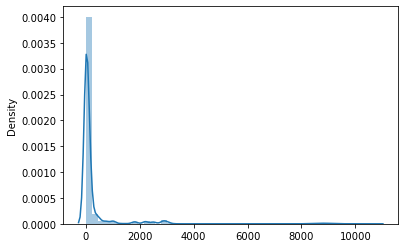

In [39]:
#Univariate Data Visualizations
sns.distplot(signal_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e23e071a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e23e0712b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e23cfc05b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e23df82190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e23df82430>,
 'means': []}

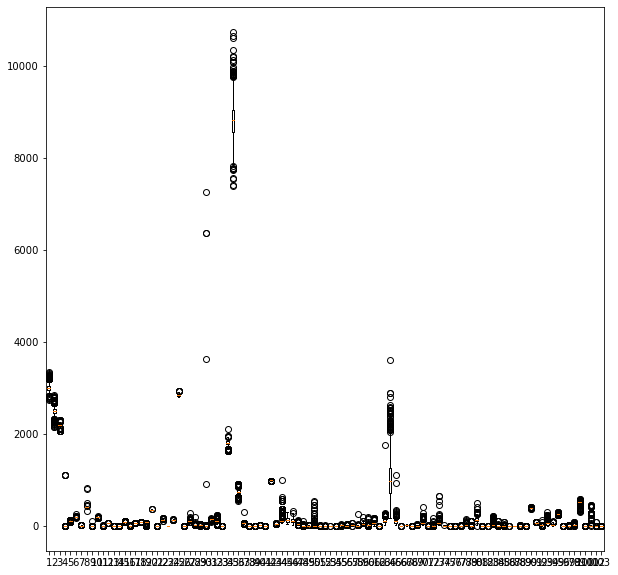

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 10))
 
# Creating plot
plt.boxplot(signal_df)
 


In [41]:
#from the above boxplots features  are having outliers.

3B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

#bivariate and multivate analysis
The term bivariate analysis refers to the analysis of two variables.

The purpose of bivariate analysis is to understand the relationship between two variables

There are three common ways to perform bivariate analysis:

1. Scatterplots

2. Correlation Coefficients

3. Simple Linear Regression

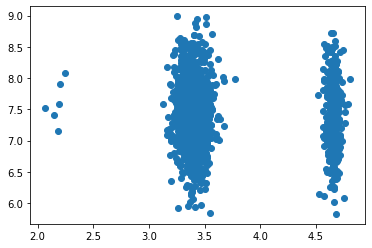

In [42]:
#Scatterplot
plt.scatter(signal_df[29], signal_df[75])


In [43]:
#The scatter plot indicates moderatively strong positive correlation between variables feature number 7 and feature no:118

In [44]:
signal_corr=signal_df.corr()
signal_corr

,0,1,2,4,5,11,12,13,14,16,...,411,417,418,419,420,425,426,427,428,437
0,1.000000,-0.143840,0.004756,-0.011014,0.002270,0.010368,-0.007058,0.030675,-0.005749,0.017691,...,0.030640,0.037917,-0.009583,-0.007999,0.058916,0.049862,-0.018953,-0.023166,0.013678,0.023589
1,-0.143840,1.000000,0.005767,-0.001636,-0.025564,0.034062,-0.037667,-0.087315,-0.001878,0.042938,...,-0.024335,-0.025492,0.037138,0.019643,-0.013734,-0.025490,-0.009000,-0.037932,0.001753,0.002273
2,0.004756,0.005767,1.000000,0.095891,-0.136225,0.018326,0.006476,0.006115,-0.000788,0.021878,...,-0.004217,0.025862,0.013310,-0.020346,0.050365,0.064282,-0.037070,-0.015600,-0.000518,0.015752
4,-0.011014,-0.001636,0.095891,1.000000,-0.074368,-0.002707,-0.017523,0.011435,-0.001763,-0.001610,...,-0.022289,-0.025806,0.041957,0.032932,-0.010889,0.027696,0.005273,-0.081983,-0.012024,-0.001616
5,0.002270,-0.025564,-0.136225,-0.074368,1.000000,0.058982,0.055333,0.039815,0.040015,0.033196,...,0.066665,-0.041082,-0.046295,-0.022655,0.012260,-0.070722,0.017264,0.026100,0.009292,-0.039517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.049862,-0.025490,0.064282,0.027696,-0.070722,-0.007246,0.002705,0.000864,-0.009876,0.000047,...,-0.011317,-0.015424,-0.002704,0.168009,0.318655,1.000000,-0.015133,-0.016163,-0.013062,0.055153
426,-0.018953,-0.009000,-0.037070,0.005273,0.017264,-0.000639,0.020110,0.011928,0.007679,-0.007288,...,0.016982,0.022871,-0.003118,-0.017709,0.012683,-0.015133,1.000000,-0.095755,-0.274167,0.010143
427,-0.023166,-0.037932,-0.015600,-0.081983,0.026100,-0.035122,0.022778,-0.019711,-0.006873,-0.035912,...,0.055318,0.046282,-0.114101,0.033850,-0.053841,-0.016163,-0.095755,1.000000,-0.151217,0.006716
428,0.013678,0.001753,-0.000518,-0.012024,0.009292,0.036757,-0.000807,-0.024789,-0.014068,0.055371,...,-0.048871,-0.045176,0.031277,0.070029,0.046813,-0.013062,-0.274167,-0.151217,1.000000,-0.017179


In [45]:
#we dont find very strong positive or negative correlation among these features, as we have already dropped highly correlated features. 

In [46]:
#pairplot

4. Data pre-processing:
A. Segregate predictors vs target attributes.

In [47]:
X= signal_df.drop(['Pass/Fail'],axis= 1)

In [48]:
y = signal_df['Pass/Fail']

In [49]:
y.value_counts()

1    1463
0     104
Name: Pass/Fail, dtype: int64

In [50]:
#SMOTE for data imbalance

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_sample(X,y)

In [52]:
y_sm.value_counts()

0    1463
1    1463
Name: Pass/Fail, dtype: int64

In [53]:
X_sm.shape,y_sm.shape

((2926, 102), (2926,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm,test_size=0.3, random_state=0,stratify = y_sm)
X_train.shape, X_test.shape

((2048, 102), (878, 102))

In [55]:
#the 5 point summary of train data
X_train.describe()

,0,1,2,4,5,11,12,13,14,16,...,411,417,418,419,420,425,426,427,428,437
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,3008.904082,2494.574529,2199.929165,3.502142,101.310537,200.003793,8.656725,412.938362,9.955095,190.048691,...,59.271139,33.240363,262.125413,0.678039,6.515783,21.710099,531.273584,2.098273,23.123164,3.143911
std,74.848564,70.671486,27.926147,49.086636,5.311953,2.908899,2.493343,12.057633,2.113287,2.484315,...,29.769451,17.649426,6.647369,0.091924,2.159647,8.969151,14.094841,0.277156,72.128337,3.183495
min,2743.240000,2162.870000,2060.660000,0.681500,82.131100,182.094000,2.376074,389.467100,8.036700,169.177400,...,5.385900,7.236900,242.580127,0.304900,1.120000,3.250400,317.196400,0.984700,3.540000,1.284500
25%,2956.086782,2457.425353,2180.888900,1.076346,98.733140,198.439216,6.882514,407.226931,9.616182,188.556612,...,41.820816,18.167653,260.759245,0.607050,4.980000,15.466200,531.060071,1.990374,7.655372,2.373475
50%,2999.611731,2497.201267,2199.051272,1.313955,101.587800,199.752391,8.643161,412.466331,9.897450,189.796988,...,57.746537,31.367839,263.427861,0.679641,6.391062,20.998033,532.614138,2.138354,8.708596,2.824567
75%,3050.592500,2531.540707,2216.500000,1.486900,104.106846,201.691830,10.321587,418.116596,10.187959,191.770554,...,70.084177,44.113400,264.548054,0.721727,7.481799,24.352025,534.326400,2.286223,10.036818,3.352750
max,3356.350000,2839.460000,2315.266700,1114.536600,129.252200,272.045100,19.546500,824.927100,102.867700,215.597700,...,303.550000,101.114600,311.404000,1.298800,19.610000,73.899000,589.508200,2.739500,454.560000,99.303200


In [56]:
#5 point summary of test data
X_test.describe()

,0,1,2,4,5,11,12,13,14,16,...,411,417,418,419,420,425,426,427,428,437
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,3004.284687,2496.436110,2200.008465,1.307812,101.456267,199.906700,8.597515,413.069662,9.879035,190.024353,...,59.697960,33.853412,262.153399,0.675300,6.471878,22.073397,530.622080,2.111834,18.409217,2.967300
std,68.273486,67.788759,26.999354,0.391708,5.180891,2.219668,2.589442,15.848125,0.520403,2.261803,...,29.704598,18.242775,6.288971,0.087190,2.342647,9.760593,16.707152,0.270904,54.992164,1.027867
min,2787.490000,2158.750000,2060.660000,0.681500,82.131100,191.077700,2.249300,333.448600,4.469600,181.111900,...,4.826900,7.236900,242.286000,0.500700,0.970000,3.342400,335.598200,0.980200,4.940000,1.197500
25%,2957.326491,2460.424498,2180.296221,1.045723,99.113300,198.445385,6.775402,407.486800,9.612576,188.596075,...,41.790800,17.566200,261.150000,0.613883,4.980000,15.466200,531.175400,1.995704,7.724437,2.331846
50%,2999.410855,2500.855000,2198.420711,1.301500,101.460000,199.747894,8.475606,412.719923,9.892120,189.798133,...,57.746537,31.865508,263.397073,0.677073,6.204584,21.117674,532.527148,2.144950,8.744915,2.752705
75%,3043.765221,2534.466709,2216.636125,1.459691,103.948390,201.431206,10.355725,417.539932,10.148087,191.567769,...,70.878400,45.996005,264.363977,0.709127,7.316563,24.947003,534.172354,2.295461,10.130000,3.233890
max,3266.550000,2846.440000,2315.266700,4.197013,129.252200,208.633000,18.862600,817.003000,12.173859,199.123600,...,290.238954,99.037500,288.864000,1.197800,32.580000,84.802400,550.585500,2.739500,438.870000,9.295300


#the statistics have not changed when comparing with the test and train with the parent dataset but with the original dataset they show slight differences 



5. Model training, testing and tuning: 
A. Use any Supervised Learning technique to train a model. 

5A.

In [57]:
#scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)


In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
rf = RandomForestClassifier(random_state=1)

rf.fit(x_train, y_train)
pred = rf.predict(X_test_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test_scaled, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
  
rf_precision = round(tp/(tp+fp), 3)  # Of all the signal predicted , how many truly predicted as 'Pass'
    
rf_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'


train_pred = rf.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)

result = pd.DataFrame({'Model' : ['rf'], 'Test Accuracy' : [rf_score],'Train Accuracy':[train_acc], 'Precision' : [rf_precision],
                      'True positive rate' : [rf_recall], 'True negative rate' : [rf_specificity],
                       'False positive rate' :  [1-rf_specificity], })
result.loc[0] = ['Random Forest', rf_score,train_acc, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.0,0.993,0.979,0.993,0.007


In [60]:
from sklearn.metrics import classification_report
target_names = ['Pass', 'Fail']
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

        Pass       0.98      0.99      0.99       439
        Fail       0.99      0.98      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878




5.B. Use cross validation techniques.


In [61]:
#k-fold cross validation( without stratification)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10

kfold = KFold(n_splits=num_folds)
results = cross_val_score(rf,x_train, y_train, cv=kfold)
results

array([0.9804878 , 0.9902439 , 0.9902439 , 0.9902439 , 0.98536585,
       0.9804878 , 0.9804878 , 0.9804878 , 0.98039216, 0.97058824])

In [62]:
np.mean(abs(results))

0.9829029172644667

In [63]:
results.std()

0.005907813697657298

In [64]:
#k-fold cross validation with stratification
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, shuffle =True, random_state = 55)
results = cross_val_score(rf, x_train, y_train, cv = stratified_kfold)

In [65]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.9809516977522715
Standard deviation:  0.007726346978102621


5.C. Apply hyper-parameter tuning techniques to get the best accuracy

In [66]:
from sklearn.model_selection import GridSearchCV
grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600]}

gs = GridSearchCV(estimator = RandomForestClassifier(random_state=1), param_grid = grid, cv = 10, n_jobs = -1, verbose = 2 )

gs.fit(x_train, y_train)

gs.best_params_


#the code takes very long to run so not able to show the execution results. the Best parameters obtained are made use in the next code snippet.

In [67]:
from sklearn.metrics import confusion_matrix
forest_tuned = RandomForestClassifier( bootstrap = False,
  max_depth = 30,
  max_features =  'auto' ,
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200, random_state= 1)

forest_tuned.fit(x_train, y_train)

pred = forest_tuned.predict(X_test_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest_tuned.score(X_test_scaled, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
forest_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass' 
forest_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = forest_tuned.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)

result.loc[1] = ['Random forest(tuned)', forest_score,train_acc, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.0,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.0,0.993,0.986,0.993,0.007


In [68]:
target_names = ['Pass', 'Fail']
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

        Pass       0.99      0.99      0.99       439
        Fail       0.99      0.99      0.99       439

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



In [70]:
from boruta import BorutaPy
boruta_selector = BorutaPy(forest_tuned,n_estimators = 'auto',verbose =2 ,random_state = 1)
boruta_selector.fit(np.array(x_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	102
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	102
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	102
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestClassifier(bootstrap=False, max_depth=30,
                                          n_estimators=47,
                                          random_state=RandomState(MT19937) at 0x1E243803340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E243803340, verbose=2)

In [71]:
#all 102 features were selected significant by BorutaPy

D. Use any other technique/method which can enhance the model performance. 

In [72]:
#trying PCA

In [73]:
XScaled = pd.DataFrame(X_sm)

In [74]:
for col in XScaled.columns[:-1]:
    Q1 = XScaled[col].quantile(0.25)
    Q3 = XScaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    
    XScaled.loc[(XScaled[col]< lower_value) | ( XScaled[col] > upper_value), col] = XScaled[col].median()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 [Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '11'),
  Text(7, 0, '12'),
  Text(8, 0, '13'),
  Text(9, 0, '14'),
  Text(10, 0, '16'),
  Text(11, 0, '17'),
  Text(12, 0, '26'),
  Text(13, 0, '27'),
  Text(14, 0, '29'),
  Text(15, 0, '30'),
  Text(16, 0, '31'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '38'),
  Text(20, 0, '40'),
  Text(21, 0, '41'

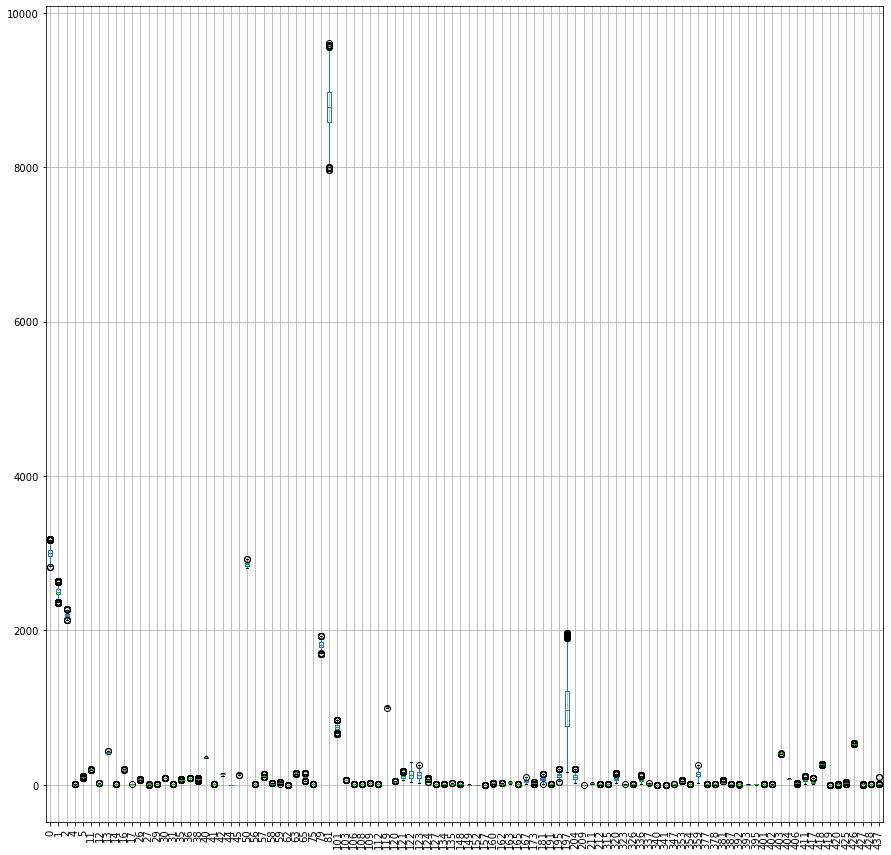

In [75]:
plt.figure(figsize= (15,15))
XScaled.boxplot()
plt.xticks(rotation = 90)

In [76]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)


[[ 3.97258589e+03 -7.32434509e+02  4.00459970e+01 ... -1.02035565e+00
  -7.31390428e+00  5.13609055e-01]
 [-7.32434509e+02  2.83290845e+03  2.61113310e+01 ... -4.53630470e-01
   5.60987268e+00  7.39748048e-01]
 [ 4.00459970e+01  2.61113310e+01  5.67980327e+02 ... -2.37291277e-02
   2.20921527e+00  7.31101053e-01]
 ...
 [-1.02035565e+00 -4.53630470e-01 -2.37291277e-02 ...  3.87202803e-02
   2.96193634e-02  1.30126129e-02]
 [-7.31390428e+00  5.60987268e+00  2.20921527e+00 ...  2.96193634e-02
   2.53642581e+00  1.15293150e-01]
 [ 5.13609055e-01  7.39748048e-01  7.31101053e-01 ...  1.30126129e-02
   1.15293150e-01  7.41584121e+00]]


In [77]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.53389718e-03 -1.30888965e-02 -7.26789867e-01 ...  1.49093312e-04
  -4.92000110e-06  1.97915559e-05]
 [-5.07320044e-03  6.33923708e-04  3.50109537e-01 ...  3.35149843e-05
  -1.69674313e-05 -1.41927595e-04]
 [ 9.87462614e-04 -1.51536675e-03 -1.30294343e-02 ...  2.03885182e-04
  -2.94564359e-04  2.87271283e-04]
 ...
 [ 7.44804045e-06  3.82327366e-05  1.06757401e-04 ...  1.03589776e-02
  -6.90604173e-03  7.97346816e-03]
 [-3.81727851e-04 -3.66072720e-04  1.62982713e-03 ...  3.12063336e-03
   5.27417774e-03  2.55176477e-03]
 [-1.07345488e-04  8.09362057e-06  5.44561849e-04 ...  7.74459865e-04
   1.61464035e-03  1.03226381e-03]]

 Eigen Values 
%s [1.15422544e+05 8.97775583e+04 4.78046841e+03 3.57188554e+03
 2.53279714e+03 1.96166757e+03 1.81784313e+03 8.50975431e+02
 8.10451380e+02 7.57573098e+02 6.46093009e+02 5.76828492e+02
 5.84560620e+02 5.86033924e+02 4.49140636e+02 4.18048443e+02
 3.78008417e+02 3.23614705e+02 3.15696678e+02 2.82814730e+02
 2.58664860e+02 8.8123

In [78]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 50.65574377  90.05661657  92.15463117  93.72223237  94.83380658
  95.6947279   96.49252868  96.86599812  97.22168269  97.55416045
  97.83771269  98.09490668  98.35145408  98.60460805  98.80172338
  98.98519322  99.1510906   99.29311609  99.43166658  99.55578609
  99.6693069   99.70798167  99.7424778   99.77495136  99.80419184
  99.82645428  99.84583381  99.86378546  99.87938075  99.89165964
  99.90299122  99.91327956  99.92250667  99.93069436  99.93702242
  99.94233421  99.94728552  99.95188201  99.95631336  99.95992866
  99.96327875  99.96638846  99.96904258  99.97160883  99.97397368
  99.97624428  99.9784006   99.98042802  99.98233436  99.98414926
  99.9858831   99.98734009  99.98869581  99.98995891  99.9910633
  99.99213829  99.99298334  99.99376302  99.99451977  99.99516848
  99.99575764  99.99631334  99.99671059  99.99709796  99.99744204
  99.99776575  99.99805102  99.99831227  99.99856156  99.99878935
  99.99899611  99.99918455  99.99935587  99.999

In [79]:
pca = PCA()
data_reduced = pca.fit_transform(XScaled)
data_reduced.transpose()

array([[ 9.38504317e+02,  7.06217915e+00, -2.03790078e+02, ...,
         1.55512947e+02,  1.83730761e+02,  2.74895244e+02],
       [ 3.24992982e+01,  3.71294834e+02, -5.18945239e+02, ...,
         1.85955921e+02, -1.03563688e+02, -1.69392721e+02],
       [-3.83710144e+01,  3.58237818e+01, -9.50651284e+01, ...,
        -1.28746545e+01,  4.93299218e+01,  2.68968263e+01],
       ...,
       [ 9.28560023e-03,  3.86667758e-03, -3.23105680e-02, ...,
         2.87087815e-02, -3.49724293e-02,  3.28477955e-02],
       [-1.02565111e-01, -4.12652272e-02, -4.35679474e-02, ...,
        -3.32815649e-02, -5.41466999e-03,  2.02222828e-02],
       [ 1.65936727e-02, -5.59188830e-03,  4.78022220e-03, ...,
        -2.27541273e-02, -5.42115936e-02,  2.58578435e-02]])

In [80]:
pca.components_


array([[-2.53389718e-03, -5.07320044e-03,  9.87462614e-04, ...,
         7.44804045e-06, -3.81727851e-04, -1.07345488e-04],
       [-1.30888965e-02,  6.33923708e-04, -1.51536675e-03, ...,
         3.82327366e-05, -3.66072720e-04,  8.09362057e-06],
       [ 7.26789867e-01, -3.50109537e-01,  1.30294343e-02, ...,
        -1.06757401e-04, -1.62982713e-03, -5.44561849e-04],
       ...,
       [ 8.27547768e-05, -8.59883619e-06,  1.06330711e-04, ...,
        -6.14633646e-03, -2.61598785e-03, -1.81743261e-04],
       [ 3.47209140e-05,  2.59585495e-05, -1.99536019e-04, ...,
        -2.45032006e-02, -3.61976819e-03,  5.08162563e-04],
       [-5.43152445e-05,  2.52057474e-05, -2.68700336e-05, ...,
         4.73410924e-03,  1.85767571e-03, -1.33943462e-04]])

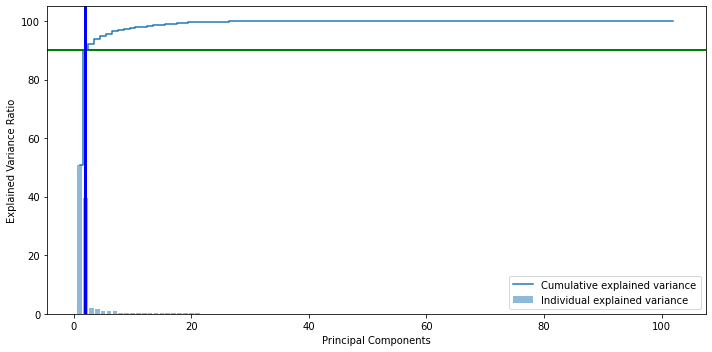

In [81]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt. axhline(y=90,linewidth=2, color='g')
plt.axvline(x=2, linewidth = 3, color ='b')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [82]:
#from the PCA we could reduce the features to 2

In [83]:
pca_rd = PCA(n_components=2)
pca_rd.fit(XScaled)

PCA(n_components=2)

In [84]:
#XScaled_pca.shape
y.shape

(1567,)

In [85]:
XScaled_pca = pd.DataFrame(pca_rd.transform(data_reduced))

print("shape after dimensionality reduction:", XScaled_pca.shape)

X_pca_train,X_pca_test,y_train,y_test= train_test_split(XScaled_pca,y_sm, test_size =0.3,stratify = y_sm,random_state = 1)

shape after dimensionality reduction: (2926, 2)


E. Display and explain the classification report in detail. 

In [86]:

X_pca_train.shape, X_pca_test.shape,y_train.shape,y_test.shape,X_sm.shape

((2048, 2), (878, 2), (2048,), (878,), (2926, 102))

In [87]:
rfc_pca = RandomForestClassifier( bootstrap = False,
  max_depth = 30,
  max_features =  'auto' ,
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200, random_state= 1)

rfc_pca.fit(X_pca_train, y_train)

pred = rfc_pca.predict(X_pca_test)

tn, fp, fn, tp =confusion_matrix(y_test, pred).ravel()

forest_score = rfc_pca.score(X_pca_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
forest_precision = round(tp/(tp+fp), 3)  # Of all the signal predicted , how many truly predicted as 'Pass'
forest_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = rfc_pca.predict(X_pca_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[2] = ['Random forest(pca)', forest_score,train_acc, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.0,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.0,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.0,0.604,0.649,0.574,0.426


In [88]:
target_names = ['Pass', 'Fail']
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

        Pass       0.62      0.57      0.60       439
        Fail       0.60      0.65      0.63       439

    accuracy                           0.61       878
   macro avg       0.61      0.61      0.61       878
weighted avg       0.61      0.61      0.61       878



In [89]:
#applying pca and tuning did not work for this model. pca reduced 102 columns to 2 columns but couldn't explain the complete model completely.
# it looks like our Baseline Random Forest model did the best, with the highest f1 score,accuracy, recall and precision. of 99. 

5F. Apply the above steps for all possible models that you have learnt so far

In [90]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(x_train, y_train)

pred = logreg.predict(X_test_scaled)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test_scaled, y_test)
lr_recall = round(tp/(tp+fn), 3)  # Of all the signal , how many were truly recognised to have 'Pass' 
lr_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass'
lr_specificity =round(tn/(tn+fp),3)   # Of all the signals, how many were recognised as truly 'Fail' 


train_pred = logreg.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)




result.loc[3] = ['Logistic Regression', lr_score, train_acc,lr_recall, lr_precision, lr_specificity, 1 - lr_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531


In [91]:
#applying on pca components
logreg_pca = LogisticRegression(solver='liblinear', random_state=0)

logreg_pca.fit(X_pca_train, y_train)

pred = logreg_pca.predict(X_pca_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg_pca.score(X_pca_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
lr_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass'
lr_specificity =round(tn/(tn+fp),3)  # Of all the signals, how many were recognised as truly 'Fail'  

train_pred = logreg_pca.predict(X_pca_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[4] = ['Logistic Regression(pca)', lr_score,train_acc, lr_recall, lr_precision, lr_specificity, 1 - lr_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426


In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =4,random_state=1)

dt.fit(x_train, y_train)

pred = dt.predict(X_test_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test_scaled, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
dt_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass'
dt_specificity =round(tn/(tn+fp),3)  # Of all the signals, how many were recognised as truly 'Fail' 

train_pred = dt.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[5] = ['Decision Tree', dt_score,train_acc, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727


In [93]:
train_pred_dt = dt.predict(x_train)
test_pred_dt = dt.predict(X_test_scaled)

In [94]:
#applying decision tree on PCA components


In [95]:
from sklearn.tree import DecisionTreeClassifier

dt_pca= DecisionTreeClassifier(max_depth =4,random_state=1)

dt_pca.fit(X_pca_train, y_train)

pred = dt_pca.predict(X_pca_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt_pca.score(X_pca_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
dt_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass'
dt_specificity =round(tn/(tn+fp),3)  # Of all the signals, how many were recognised as truly 'Fail' 

train_pred = dt_pca.predict(X_pca_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[6] = ['Decision Tree(pca)', dt_score, train_acc,dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727
6,Decision Tree(pca),0.576310,0.612305,0.562,0.690,0.462,0.538


In [96]:
from sklearn.svm import SVC

svm = SVC(C=1, gamma=1, kernel='rbf')

svm.fit(x_train, y_train)

pred = svm.predict(X_test_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

svm_score = svm.score(X_test_scaled, y_test)
svm_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
svm_precision = round(tp/(tp+fp), 3)  # Of all the signal predicted , how many truly predicted as 'Pass'
svm_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = svm.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[7] = ['SVM', svm_score,train_acc, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727
6,Decision Tree(pca),0.576310,0.612305,0.562,0.690,0.462,0.538
7,SVM,0.506834,0.969238,0.519,0.185,0.829,0.171


In [97]:
train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(X_test_scaled)

In [98]:
#svm is not good for this data.lets try with pca components
svm_pca = SVC(C=1, gamma=1, kernel='rbf')

svm_pca.fit(X_pca_train, y_train)

pred = svm_pca.predict(X_pca_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

svm_score = svm_pca.score(X_pca_test, y_test)
svm_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass'
svm_precision = round(tp/(tp+fp), 3)  # Of all the signal predicted , how many truly predicted as 'Pass'
svm_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = svm_pca.predict(X_pca_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[8] = ['SVM(pca)', svm_score,train_acc, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727
6,Decision Tree(pca),0.576310,0.612305,0.562,0.690,0.462,0.538
7,SVM,0.506834,0.969238,0.519,0.185,0.829,0.171
8,SVM(pca),0.620729,0.684570,0.616,0.640,0.601,0.399


In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3, n_jobs=1000)

knn.fit(x_train, y_train)


pred = knn.predict(X_test_scaled)


tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_score = knn.score(X_test_scaled, y_test)
knn_recall = round(tp/(tp+fn), 3)   # Of all the signal , how many were truly recognised to have 'Pass' 
knn_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass' 
knn_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = knn.predict(x_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[9] = ['knn', knn_score,train_acc, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727
6,Decision Tree(pca),0.576310,0.612305,0.562,0.690,0.462,0.538
7,SVM,0.506834,0.969238,0.519,0.185,0.829,0.171
8,SVM(pca),0.620729,0.684570,0.616,0.640,0.601,0.399
9,knn,0.490888,0.751465,0.491,0.524,0.458,0.542


In [100]:
train_pred_knn = knn.predict(x_train)
test_pred_knn = knn.predict(X_test_scaled)

In [101]:

knn_pca = KNeighborsClassifier(n_neighbors= 3, n_jobs=1000)

knn_pca.fit(X_pca_train, y_train)


pred = knn_pca.predict(X_pca_test)


tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_score = knn_pca.score(X_pca_test, y_test)
knn_recall = round(tp/(tp+fn), 3)    # Of all the signal , how many were truly recognised to have 'Pass'
knn_precision = round(tp/(tp+fp), 3) # Of all the signal predicted , how many truly predicted as 'Pass' 
knn_specificity =round(tn/(tn+fp),3) # Of all the signals, how many were recognised as truly 'Fail'

train_pred = knn_pca.predict(X_pca_train)
train_acc = accuracy_score(y_train,train_pred)


result.loc[10] = ['knn(pca)', knn_score,train_acc, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Test Accuracy,Train Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Random Forest,0.986333,1.000000,0.993,0.979,0.993,0.007
1,Random forest(tuned),0.989749,1.000000,0.993,0.986,0.993,0.007
2,Random forest(pca),0.611617,1.000000,0.604,0.649,0.574,0.426
3,Logistic Regression,0.494305,0.590332,0.519,0.495,0.469,0.531
4,Logistic Regression(pca),0.555809,0.575195,0.538,0.558,0.574,0.426
5,Decision Tree,0.523918,0.589355,0.516,0.774,0.273,0.727
6,Decision Tree(pca),0.576310,0.612305,0.562,0.690,0.462,0.538
7,SVM,0.506834,0.969238,0.519,0.185,0.829,0.171
8,SVM(pca),0.620729,0.684570,0.616,0.640,0.601,0.399
9,knn,0.490888,0.751465,0.491,0.524,0.458,0.542


6.A. Post Training and Conclusion: 
A. Display and compare all the models designed with their train and test accuracies

CONCLUSION From all these models it is seen that performance increase happens when applied on pca components than their respective base models.However  Random Forest tuned Model outperformed everything else. with only .005 % of signals getting classified as false positive that is Those 'Fail' signals were falsely classified as 'Fail'.

6A. Display and compare all the models designed with their train and test accuracies

In [103]:
result[['Model','Test Accuracy','Train Accuracy']]

,Model,Test Accuracy,Train Accuracy
0,Random Forest,0.986333,1.000000
1,Random forest(tuned),0.989749,1.000000
2,Random forest(pca),0.611617,1.000000
3,Logistic Regression,0.494305,0.590332
4,Logistic Regression(pca),0.555809,0.575195
5,Decision Tree,0.523918,0.589355
6,Decision Tree(pca),0.576310,0.612305
7,SVM,0.506834,0.969238
8,SVM(pca),0.620729,0.684570
9,knn,0.490888,0.751465


6B. Select the final best trained model along with your detailed comments for selecting this model

From the above dataset of result it can be seen that the random forest outperformed rest of all the models and when tuned it went to give better accuracy.Random Forest is an ensemble of classification algorithm widely used in much application especially with larger datasets because of its outstanding features like Variable Importance measure, OOB error detection, Proximity among the feature and handling of imbalanceddatasets.This random selection of the predictor variables results in less correlation among the trees and has a lower error rate . To predict target value for new data instance, the new observation is  fed to  all  classification trees  in  the Random  Forest.  The numbers of  prediction for  a class performed  by each  of the classification  trees  are  counted.  Then,  the  class  with  the maximum number of votes is returned as the class label  for the new data instance.

6C. Pickle the selected model for future use. 

In [104]:
import pickle
Pickled = pickle.dumps(forest_tuned) 
    
Pickled_Load = pickle.loads(Pickled)


6D.Write your conclusion on the results. 

In [ ]:
From all these models it is seen that performance increase happens when applied on pca components than their respective base models.However Random Forest tuned Model outperformed everything else. with only .005 % of signals getting classified as false positive that is Those 'Fail' signals were falsely classified as 'Fail'.
The dataset which had hundreds of features were put down to 102 features and random forest classifier could almost correctly classify the signals as "pass"" or "Fail", with very few misclassification.""